In [41]:
import pandas as pd

In [72]:
df=pd.read_csv("banklimpio.csv")
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41114,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
41115,73,2850,17,300,1,40,8,0,0,1,...,0,0,0,0,0,0,0,1,0,1
41116,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
41117,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


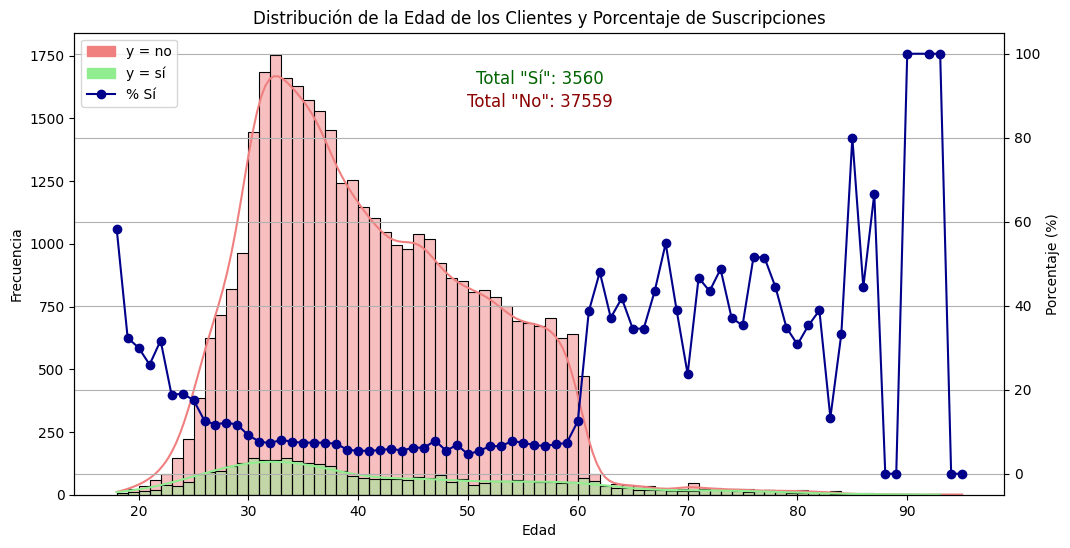

In [43]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los límites de los bins para que cada bin represente un año
age_bins = range(df['age'].min(), df['age'].max() + 1)

plt.figure(figsize=(12, 6))
# Histograma para 'y = no'
sns.histplot(df[df['y_yes'] == 0]['age'], bins=age_bins, color='lightcoral', edgecolor='black', kde=True)
# Histograma para 'y = sí'
sns.histplot(df[df['y_yes'] == 1]['age'], bins=age_bins, color='lightgreen', edgecolor='black', kde=True)

plt.xlabel('Edad')
plt.ylabel("Frecuencia")
plt.title('Distribución de la Edad de los Clientes y Porcentaje de Suscripciones')


# Calcular el porcentaje de "sí" para cada edad
age_counts = df.groupby('age')['y_yes'].agg(['sum', 'count'])
age_counts['percentage_yes'] = (age_counts['sum'] / age_counts['count']) * 100

# Añadir una línea para el porcentaje de "sí" sobre los histogramas
second_axis = plt.gca().twinx()  # Crear un segundo eje y
second_axis.plot(age_counts.index, age_counts['percentage_yes'], color='darkblue', marker='o', linestyle='-')
second_axis.set_ylabel('Porcentaje (%)')  # Etiqueta del eje derecho como "Porcentaje"


# Crear manejadores personalizados para las leyendas
legend_y_no = mpatches.Patch(color='lightcoral', label='y = no')
legend_y_yes = mpatches.Patch(color='lightgreen', label='y = sí')
legend_percentage = mlines.Line2D([], [], color='darkblue', marker='o', linestyle='-', label='% Sí')

# Colocar la leyenda personalizada en la esquina superior izquierda
plt.legend(handles=[legend_y_no, legend_y_yes, legend_percentage], loc='upper left')

total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes
plt.text(0.5, 0.90, f'Total "Sí": {total_yes}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkgreen')
plt.text(0.5, 0.85, f'Total "No": {total_no}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkred')

# Ajustes finales
plt.grid(True)  # Activar cuadrícula
plt.show()






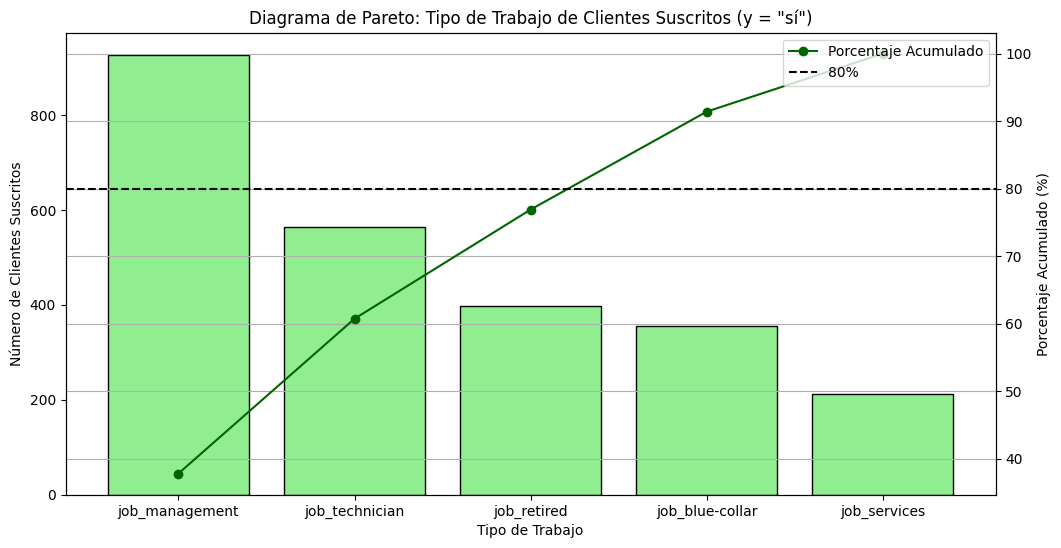

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 1].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightgreen', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes Suscritos (y = "sí")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkgreen', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


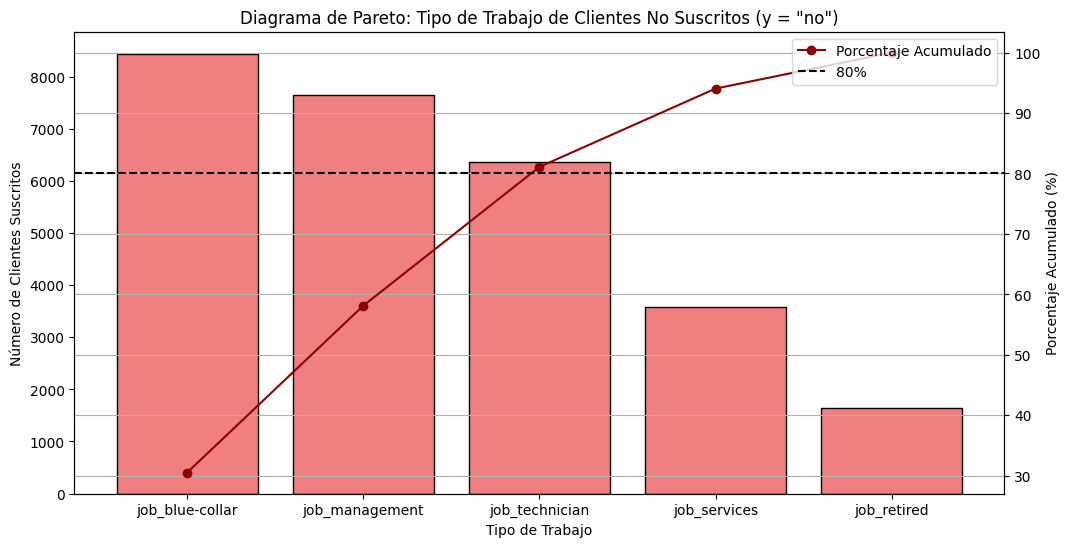

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 0].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightcoral', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes No Suscritos (y = "no")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkred', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


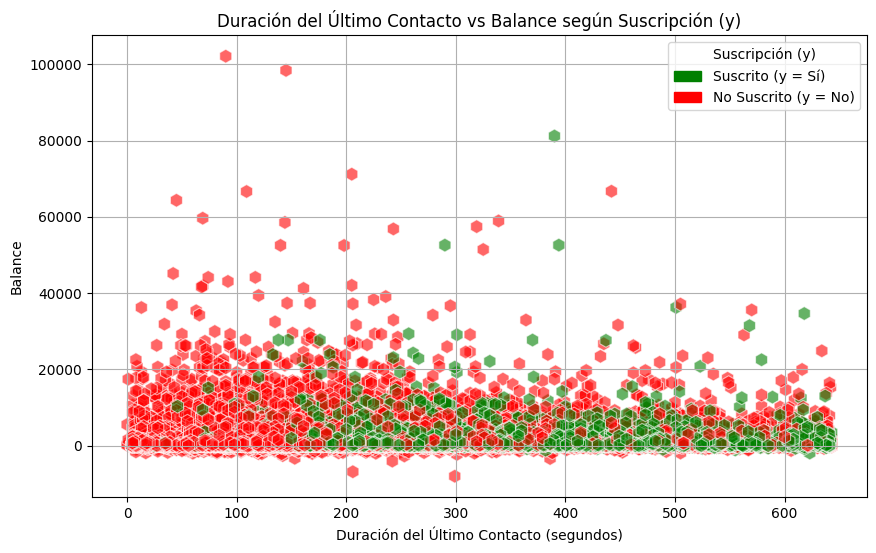

In [46]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generar un gráfico de dispersión que muestre duración, balance y la variable de suscripción (y)
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión usando seaborn
scatter = sns.scatterplot(data=df, x='duration', y='balance', hue='y_yes', 
                          palette={1: 'green', 0: 'red'}, alpha=0.6, s=100, marker="h")

# Ajustes de etiquetas y título
plt.xlabel("Duración del Último Contacto (segundos)")
plt.ylabel("Balance")
plt.title("Duración del Último Contacto vs Balance según Suscripción (y)")

# Añadir leyenda personalizada
handles = [mpatches.Patch(color='green', label='Suscrito (y = Sí)'), 
           mpatches.Patch(color='red', label='No Suscrito (y = No)')]
plt.legend(handles=handles, title="Suscripción (y)", loc='upper right')

plt.grid(True)  # Activar cuadrícula
plt.show()


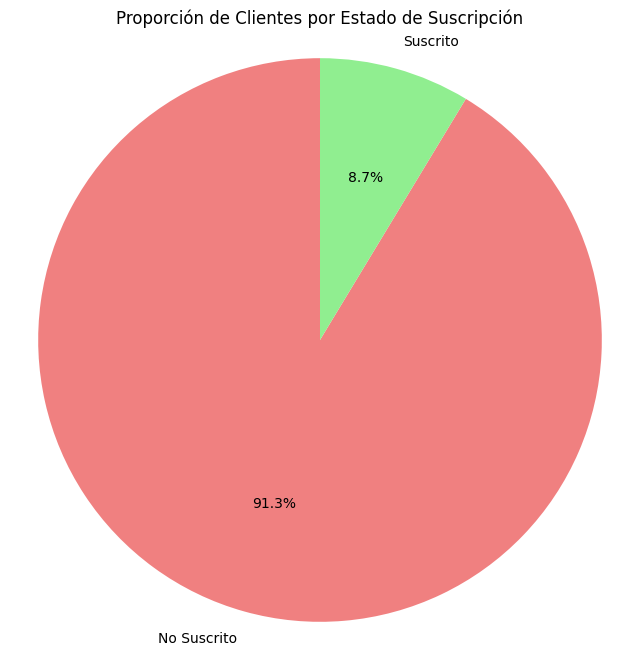

In [47]:
# Calcular el total de "Sí" y "No"
total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes

# Generar solo el pie chart con colores claros
plt.figure(figsize=(8, 8))

# Pie chart para mostrar la proporción de suscriptores y no suscriptores
sizes = [total_no, total_yes]
labels = ['No Suscrito', 'Suscrito']
colors = ['lightcoral', 'lightgreen']  # Colores claros
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proporción de Clientes por Estado de Suscripción")

plt.show()


C:\Users\srodr\AppData\Local\Temp\ipykernel_31972\697335248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")


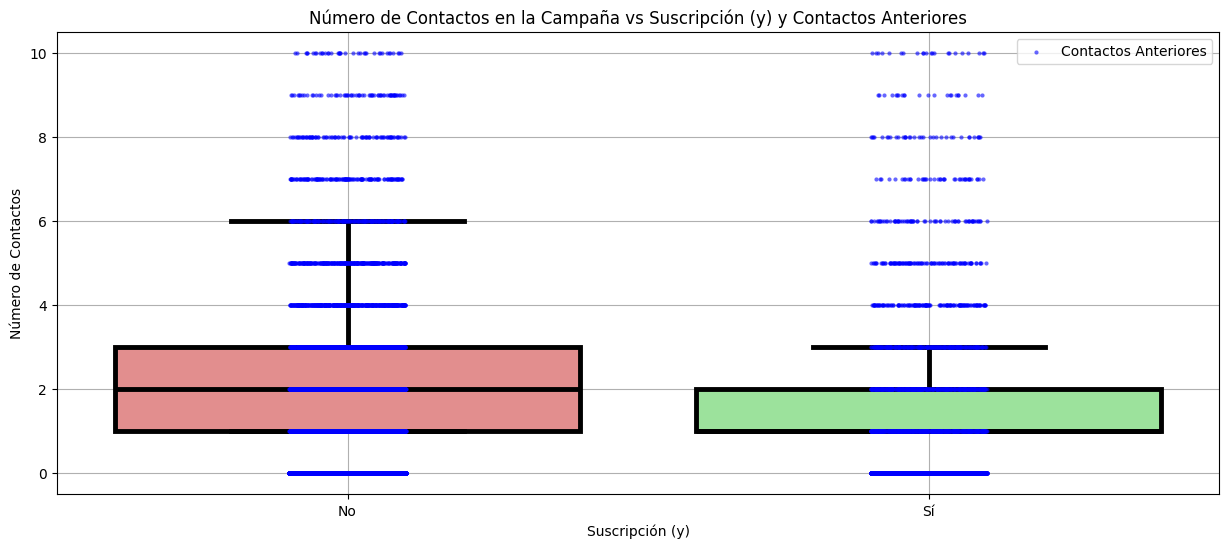

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Asegurarnos de que los valores de y_yes sean tratados como cadenas
df['y_yes'] = df['y_yes'].astype(str)

# Crear un gráfico que combine los datos de 'campaign' y 'previous'
plt.figure(figsize=(15, 6))




# Gráfico de puntos para el número de contactos en campañas anteriores
sns.stripplot(x='y_yes', y='previous', data=df, color='blue', alpha=0.6, jitter=True, marker='o', size=3, label='Contactos Anteriores')
plt.legend(loc='upper right', labels=["Contactos Anteriores"])

# Boxplot para el número de contactos en la campaña actual con colores claros
sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")

# Ajustes de etiquetas y título
plt.xlabel("Suscripción (y)")
plt.ylabel("Número de Contactos")
plt.title("Número de Contactos en la Campaña vs Suscripción (y) y Contactos Anteriores")

# Añadir leyenda para los contactos anteriores


plt.grid(True)  # Activar cuadrícula
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar los ticks del eje x
plt.show()



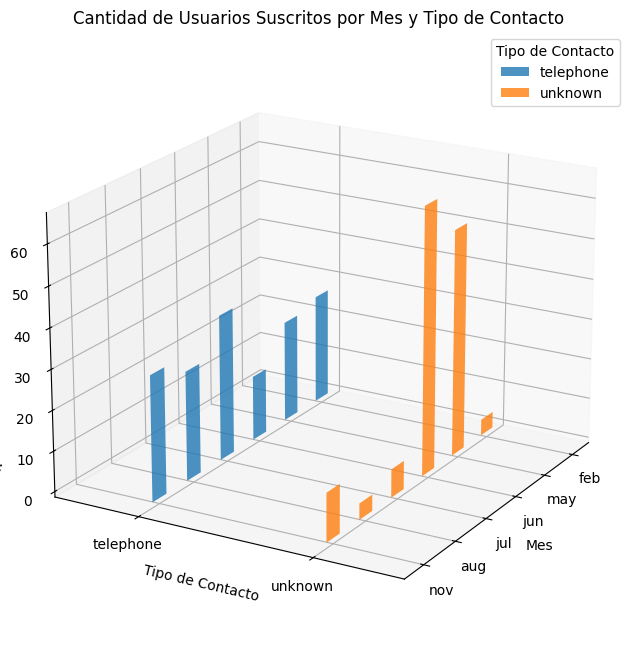

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Definir el orden de los meses
month_order = ['month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may', 
               'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct', 
               'month_nov', 'month_dec']

# Filtrar las columnas de meses que están presentes en el DataFrame
available_months = [month for month in month_order if month in df.columns]

# Inicializar un DataFrame para contar las suscripciones por mes y tipo de contacto
contact_counts = []

# Contar los usuarios suscritos por mes y tipo de contacto
for month in available_months:
    for contact_type in ['contact_telephone', 'contact_unknown']:
        count = df[(df[month] == 1) & (df[contact_type] == 1) & (df['y_yes'] == 1)].shape[0]
        contact_counts.append({
            'month': month.split('_')[1],
            'contact': contact_type.split('_')[1],
            'count': count
        })

# Convertir a DataFrame
contact_counts_df = pd.DataFrame(contact_counts)

# Preparar los datos para el gráfico 3D
months = contact_counts_df['month'].unique()
contact_types = contact_counts_df['contact'].unique()
count_matrix = np.zeros((len(months), len(contact_types)))

for i, month in enumerate(months):
    for j, contact_type in enumerate(contact_types):
        count = contact_counts_df[(contact_counts_df['month'] == month) & (contact_counts_df['contact'] == contact_type)]['count']
        count_matrix[i, j] = count.values[0] if not count.empty else 0

# Crear un gráfico 3D de barras
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir las posiciones en el eje X y Y
x_pos = np.arange(len(months))
y_pos = np.arange(len(contact_types))

# Crear las barras 3D para cada tipo de contacto
for j in range(len(contact_types)):
    ax.bar(x_pos, count_matrix[:, j], zs=j, zdir='y', alpha=0.8, width=0.4, label=contact_types[j])

# Etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Tipo de Contacto')
ax.set_zlabel('Cantidad de Usuarios Suscritos')
ax.set_title('Cantidad de Usuarios Suscritos por Mes y Tipo de Contacto')

# Ajustar ticks del eje X
ax.set_xticks(x_pos)
ax.set_xticklabels(months)

# Configurar etiquetas del eje Y
ax.set_yticks(y_pos)
ax.set_yticklabels(contact_types)

# Ajustar la escala del eje Y para que sea más pequeño
ax.set_ylim([-0.5, len(contact_types) - 0.5])  # Ajustar el límite del eje Y

# Asegurarse de que la etiqueta del eje Z se vea correctamente
ax.zaxis.label.set_size(12)  # Aumentar el tamaño de la etiqueta del eje Z
ax.zaxis.label.set_color('black')  # Color de la etiqueta del eje Z

# Leyenda
ax.legend(title='Tipo de Contacto', loc='upper right')

# Establecer el ángulo de visión del gráfico
ax.view_init(elev=20, azim=30)

plt.show()




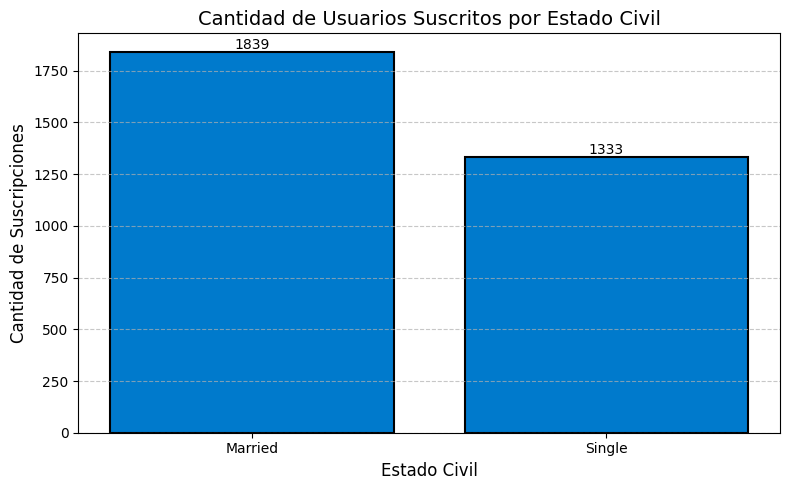

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Inicializar un DataFrame para contar las suscripciones por estado civil
marital_counts = {
    'Married': df[(df['marital_married'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Single': df[(df['marital_single'] == 1) & (df['y_yes'] == 1)].shape[0],
}

# Crear un DataFrame a partir de los resultados
marital_counts_df = pd.DataFrame(list(marital_counts.items()), columns=['Estado Civil', 'Cantidad de Suscripciones'])

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(marital_counts_df['Estado Civil'], marital_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)

# Mejorar el estilo del gráfico
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Estado Civil', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Activar cuadrícula en el eje Y

# Añadir etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()



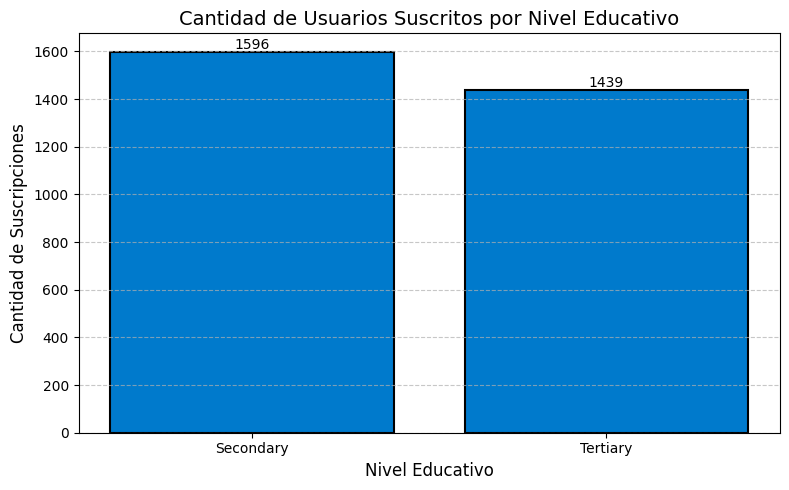

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Inicializar un DataFrame para contar las suscripciones por nivel educativo
education_counts = {
    'Secondary': df[(df['education_secondary'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Tertiary': df[(df['education_tertiary'] == 1) & (df['y_yes'] == 1)].shape[0],
}

# Crear un DataFrame a partir de los resultados
education_counts_df = pd.DataFrame(list(education_counts.items()), columns=['Nivel Educativo', 'Cantidad de Suscripciones'])

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(education_counts_df['Nivel Educativo'], education_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)

# Mejorar el estilo del gráfico
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Nivel Educativo', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Activar cuadrícula en el eje Y

# Añadir etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()


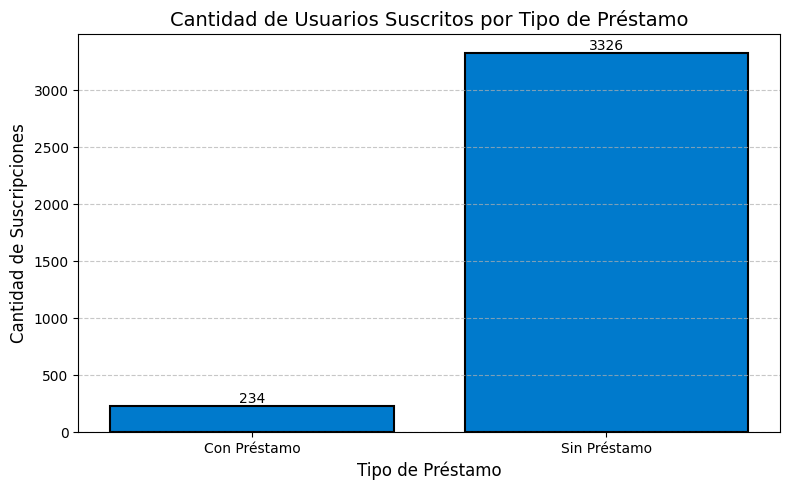

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Inicializar un DataFrame para contar las suscripciones por tipo de préstamo
loan_counts = {
    'Con Préstamo': df[(df['loan_yes'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Sin Préstamo': df[(df['loan_yes'] == 0) & (df['y_yes'] == 1)].shape[0],
}

# Crear un DataFrame a partir de los resultados
loan_counts_df = pd.DataFrame(list(loan_counts.items()), columns=['Tipo de Préstamo', 'Cantidad de Suscripciones'])

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars_loan = plt.bar(loan_counts_df['Tipo de Préstamo'], loan_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)
plt.xlabel('Tipo de Préstamo', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Tipo de Préstamo', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Activar cuadrícula en el eje Y

# Añadir etiquetas encima de las barras
for bar in bars_loan:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()



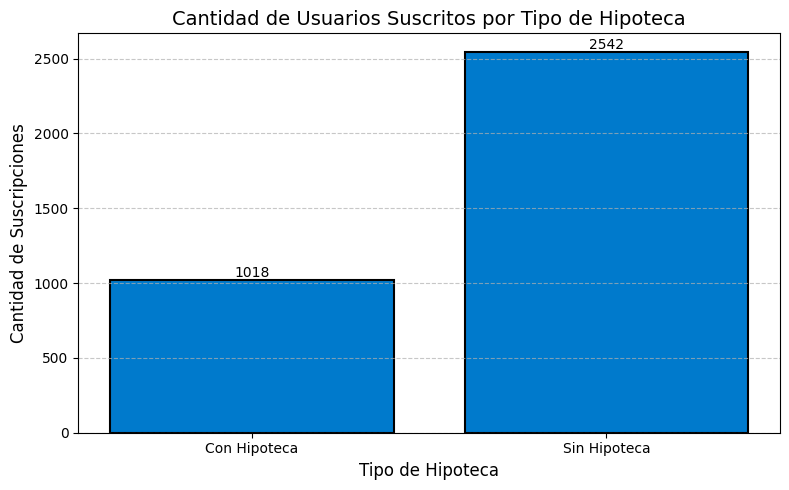

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Inicializar un DataFrame para contar las suscripciones por tipo de hipoteca
housing_counts = {
    'Con Hipoteca': df[(df['housing_yes'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Sin Hipoteca': df[(df['housing_yes'] == 0) & (df['y_yes'] == 1)].shape[0],
}

# Crear un DataFrame a partir de los resultados
housing_counts_df = pd.DataFrame(list(housing_counts.items()), columns=['Tipo de Hipoteca', 'Cantidad de Suscripciones'])

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars_housing = plt.bar(housing_counts_df['Tipo de Hipoteca'], housing_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)
plt.xlabel('Tipo de Hipoteca', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Tipo de Hipoteca', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Activar cuadrícula en el eje Y

# Añadir etiquetas encima de las barras
for bar in bars_housing:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el espaciado
plt.show()


C:\Users\srodr\AppData\Local\Temp\ipykernel_31972\1715277224.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y_yes', y='pdays', data=df, palette={"0": "lightcoral", "1": "lightgreen"})


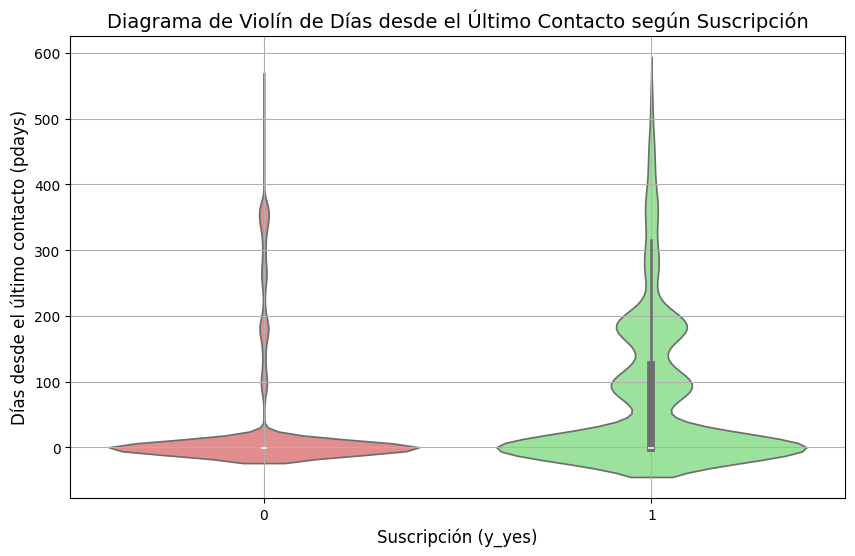

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv("banklimpio.csv")

# Crear un gráfico de violín para 'pdays' según la variable de respuesta 'y_yes'
plt.figure(figsize=(10, 6))

# Crear el gráfico de violín con colores personalizados
sns.violinplot(x='y_yes', y='pdays', data=df, palette={"0": "lightcoral", "1": "lightgreen"})

# Ajustes de etiquetas y título
plt.xlabel('Suscripción (y_yes)', fontsize=12)
plt.ylabel('Días desde el último contacto (pdays)', fontsize=12)
plt.title('Diagrama de Violín de Días desde el Último Contacto según Suscripción', fontsize=14)

plt.grid(True)  # Activar cuadrícula
plt.show()

